In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
# Import libraries
import numpy as np
import pandas as pd
import pandas.io.data as web
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
%matplotlib inline 
# If you are using IPython, this will make the images available in the notebook

In [30]:
start = '2014-01-01'
end = '2015-01-01'
asset = web.DataReader('THD', data_source='yahoo',start=start, end=end)
benchmark = web.DataReader('EUSA', data_source='yahoo', start=start,end = end)

In [31]:
asset.rets = np.log(asset['Adj Close'] / asset['Adj Close'].shift(1))
benchmark.rets = np.log(benchmark['Adj Close'] / benchmark['Adj Close'].shift(1))

In [32]:
asset.rets = asset.rets[np.logical_not(np.isnan(asset.rets))]
benchmark.rets = benchmark.rets[np.logical_not(np.isnan(benchmark.rets))]

In [33]:
mean_expected_value = asset.rets.mean()

In [34]:
Squared_errors = pd.Series(mean_expected_value -\
                          asset.rets)**2 
SSE = np.sum(Squared_errors)
print ('Sum of Squared Errors (SSE): %01.f' % SSE)

Sum of Squared Errors (SSE): 0


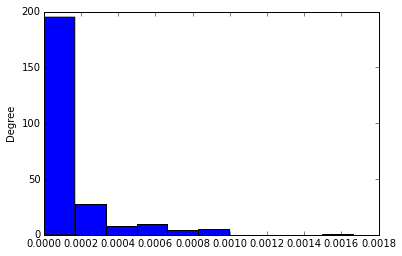

In [35]:
density_plot = Squared_errors.plot('hist')

In [36]:
def standard_deviation(variable, bias=0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations-min(bias,1)))

print ('Our function\'s result: %0.5f against Numpy\'s: %0.5f' % (standard_deviation(asset.rets), np.std(asset.rets)))

Our function's result: 0.01133 against Numpy's: 0.01133


In [37]:
def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations-min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1,var2,bias=0):
    return covariance(standardize(var1), standardize(var2),bias)


print ('Our correlation estimation: %0.5f' % (correlation(asset.rets, benchmark.rets)))


#print (help(np.corrcoef))

Our correlation estimation: 0.41275


In [38]:
from scipy.stats.stats import pearsonr
print ('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(asset.rets, benchmark.rets)[0])

Correlation from Scipy pearsonr estimation: 0.41275


In [39]:
x_range = [asset.rets.min(),asset.rets.max()]
y_range = [benchmark.rets.min(),benchmark.rets.max()]

In [40]:
#scatter_plot = dataset.plot(kind='scatter', x='Asset', y='BENCHMARK', xlim=x_range, ylim=y_range)
#meanY = scatter_plot.plot(x_range, [benchmark.rets.mean(),benchmark.rets.mean()], '--', color='red', linewidth=1)
#meanX = scatter_plot.plot([asset.rets.mean(),asset.rets.mean()], y_range, '--', color='red', linewidth=1)

In [41]:
dataset= pd.concat([asset.rets, benchmark.rets], join='outer', axis = 1)

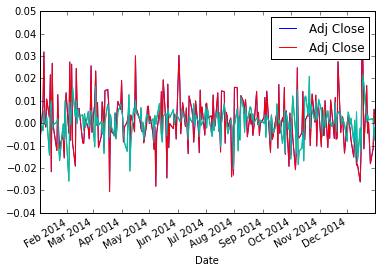

In [42]:
dataset.plot()

In [43]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     51.13
Date:                Sat, 23 Jul 2016   Prob (F-statistic):           9.58e-12
Time:                        13:11:21   Log-Likelihood:                 791.77
No. Observations:                 251   AIC:                            -1580.
Df Residuals:                     249   BIC:                            -1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0006      0.001      0.892      0.373        -0.001     0.002
x1             0.6626      0.093      7.151      0.000         0.480     0.845
==============================================================================
Omnibus:                        4.139   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                5.071
Skew:                           0.073   Prob(JB):                       0.0792
Kurtosis:                       3.681   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

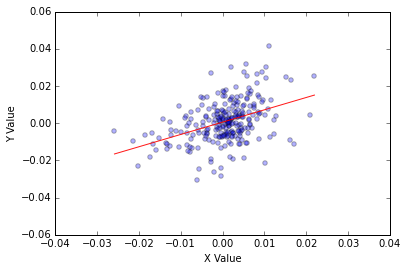

In [44]:
linreg(benchmark.rets.values,asset.rets.values)